# One Million Headlines
Originally, this project was an assessment for my Graduate Certificate at Queensland University of Technology (referred to as QUT). The dataset was provided to us to conduct a complete data analysis and write a report on the findings.
My first goal was to discover the main subjects discussed in Australian news media over the last 20 years by analyzing approximately 1.2 million headlines. The dataset we will use is from ABC News, available at [Kaggle](https://www.kaggle.com)


#### DISCLAIMER
At this moment, our intention is to showcase basic skills related to data analysis. Several modifications were made to the original assessment. The original assessment ended with the first line chart and word cloud, followed by a short report on the findings.
It's evident that further processing is required, which involves filtering out some frequently repeated expressions in the second data analysis round outcome. However, this does not align with the main goal of this project, which is to provide a brief showcase of data analysis skills, so the analysis will stop after presenting the top words trios. Additionally, no final report will be provided.
. 

We will analyze the most used words in the dataset to infer the trending topics over the years.

Let's get started


### Libraries, Packages and Modules used: 
- pandas
- numpy
- ntlk
- regex
- os
- matplotlib
- itertools
- collections
- wordcloud
- seaborn

I have always been curious about the topics that have concerned people in Australia over the years. This project in my postgraduate course at QUT provided an opportunity to investigate this through one of Australia's prime news media sources, ABC News. The million-dollar question is: What subjects are the regular news audience interested in?

# STEP 1 : The Dataset

Let's access the dataset using Kaggle API. [Kagggle website] (https://www.kaggle.com/). 
The data is [A Million News Headlines](https://www.kaggle.com/therohk/million-headlines)

In [120]:
# Importing the libraries 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import seaborn as sns
from collections import Counter
import itertools
import warnings

In [121]:
# Installing Kaggle api
!pip3 install kaggle
# Connect to Kaggle API
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [122]:
# Download the desired dataset
!kaggle datasets download -d therohk/million-headlines

Dataset URL: https://www.kaggle.com/datasets/therohk/million-headlines
License(s): CC0-1.0
million-headlines.zip: Skipping, found more recently modified local copy (use --force to force download)


In [123]:
# Unzipping the downloaded file
import zipfile
with zipfile.ZipFile('C:/Users/edy-a/million-headlines.zip', 'r') as file_zip:
    file_zip.extractall('C:/Users/edy-a/Desktop/My Portfolio 2024/million-headlines')

In [124]:
# Data loading
abcnews_df = pd.read_csv('C:/Users/edy-a/Desktop/My Portfolio 2024//million-headlines/abcnews-date-text.csv')

In [125]:
# Glimpse of the dataset
dims = abcnews_df.shape
print("This dataset has %d rows and %d columns"%dims)

This dataset has 1244184 rows and 2 columns


In [126]:
abcnews_df

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers
...,...,...
1244179,20211231,two aged care residents die as state records 2...
1244180,20211231,victoria records 5;919 new cases and seven deaths
1244181,20211231,wa delays adopting new close contact definition
1244182,20211231,western ringtail possums found badly dehydrate...


So we have more than 1.2 million headlines, spanning from 19/02/2003 to 31/12/2021.
Out of these headlines, let's try to find out what were the most present news on the last 20 years. 
I wonder: what are its datatypes? 
Let's check it out!

In [128]:
print('Exploring the Datatypes -')
print(f'{abcnews_df.dtypes}')

Exploring the Datatypes -
publish_date      int64
headline_text    object
dtype: object


Missing values are very common in real world datasets. This is one of the main obstacles data analyts encounter daily. It is important to impute missing values otherwise it may alter our findings.

Another critical aspect we need to be mindfull about is data duplicity. Data entry errors, among others, are the primary causes of duplicity in data. And, as a good practice, we need to check if there are duplicate instances in our data.

Checking for missing values and duplicates

In [130]:
print('Missing values in dataset for each variable:')
print(f'{abcnews_df.isnull().sum()}')
print('')
print(f'Duplicates in dataset:- {abcnews_df.duplicated().sum()}, ({np.round(100*abcnews_df.duplicated().sum()/len(abcnews_df),1)}%)')

Missing values in dataset for each variable:
publish_date     0
headline_text    0
dtype: int64

Duplicates in dataset:- 2, (0.0%)


As the outline above, there aren't any missing values, but there are two duplicates. 

In [132]:
# Identify duplicate rows
duplicate_rows = abcnews_df[abcnews_df.duplicated()]

# Display duplicate rows
print('Duplicate rows:')
print(duplicate_rows)

Duplicate rows:
         publish_date                                     headline_text
1232754      20210301  house prices record sharpest increase since 2003
1237050      20210601    house prices reach record levels; as investors


One headline in 01/03/2021 and another one in 01/06/2021. They are not really duplicates. 
They are similar subjects, but different texts, so we can't consider them as duplicates. 
Let's move on. 

# STEP 2: Pre-processing the dataset

Before diving into detailed analysis, we need to preprocess the data. This involves cleaning the text data, removing stopwords, and tokenizing the headlines.

In [136]:
# Let's apply regex, and for that, ensure each headline is a string before
all_words_list = []

for headline in abcnews_df['headline_text']:
    # Convert headline to string using regex to find all words
    words = re.findall(r'\w+', str(headline))
    # Extend the all_words_list with the found words
    all_words_list.extend(words)

# Display the first 5 words for a test
print(all_words_list[:5])

['aba', 'decides', 'against', 'community', 'broadcasting']


Now we can count the most often repeated words in this dataset.

In [138]:
# Adding a 'Year' column to the dataset, extracting the year from the 'publish_date' column
# and creating a new 'year' column
# Extract the year from publish_date
abcnews_df['year'] = abcnews_df['publish_date'].astype(str).str[:4].astype(int)

In [139]:
# Aggregating the word counts using all_words_list
df_all_words_agg = pd.DataFrame(all_words_list, columns=['Word']).groupby('Word').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_all_words_agg.head()

,Word,Count
95195,to,238379
47329,in,156203
36975,for,143278
67883,of,95941
68284,on,82062


It is not surprising that these words would repeat often, as they are quite common in English. That won't tell us much helpful towards our findings.
Next step is to filter out these words.

In [141]:
# Filtering out common English words (stop words) to identify themes:
# Define a list of common English stop words

from nltk.corpus import stopwords

# Define the list of stop words
stop_words = set(stopwords.words('english'))

# Filter out the stop words from all_words_list
filtered_words_list = [word for word in all_words_list if word.lower() not in stop_words]

# Aggregating the word counts for the filtered words
df_filtered_words_agg = pd.DataFrame(filtered_words_list, columns=['Word']).groupby('Word').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
df_filtered_words_agg.head(10)

,Word,Count
73353,police,39852
65879,new,33742
58413,man,30762
83257,says,23732
99119,us,20424
24054,court,18187
9253,australia,17416
40831,govt,17104
23958,council,16988
67046,nsw,16544


From this pre-processing, our data is ready for a superficial analysis.

We can count how many times non stop words repeat, we can see even the years they happened. There are many possibilities here, for instance, we can aggregate by decade, year, or even by week and month, by making some alteration in the code.

# STEP 3: Visualizing the dataframe

After pre-processing the data, we can visualize the most frequent words using word clouds and other plots.

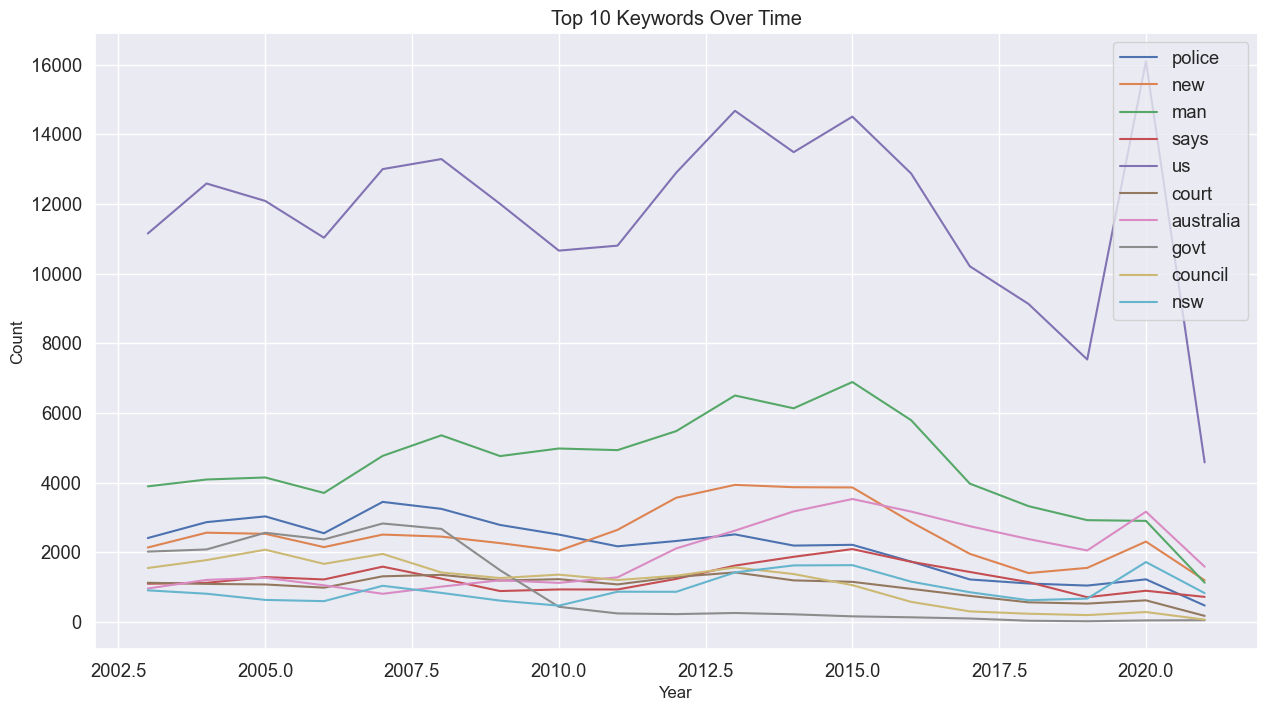

In [145]:
import matplotlib.pyplot as plt

# Referring to Step 2, 'df_filtered_words_agg' is the DataFrame with filtered words and their counts
top_10_words = df_filtered_words_agg['Word'].head(10).tolist()

# Escape any special regex characters in the words
escaped_words = [re.escape(word) for word in top_10_words]

# Create a DataFrame with word occurrences over the years
word_occurrences = []
for word in escaped_words:
    df_temp = abcnews_df[abcnews_df['headline_text'].str.contains(word, case=False, na=False)]
    yearly_word_counts = df_temp.groupby('year').size().reset_index(name='Count')
    yearly_word_counts['Word'] = word
    word_occurrences.append(yearly_word_counts)

word_occurrences_df = pd.concat(word_occurrences)

# Pivoting the data for plotting
pivot_data = word_occurrences_df.pivot(index='year', columns='Word', values='Count').fillna(0)

# Plotting
plt.figure(figsize=(15, 8))
for word in top_10_words:
    if word in pivot_data.columns:
        plt.plot(pivot_data.index, pivot_data[word], label=word)

plt.title('Top 10 Keywords Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(loc='upper right')
plt.show()

The above vizualization doesn't help much, as we can notice. 

The fact that most word occurences declined after 2015, possibly means that happened due either editorial changes in the newspaper or just a public view trend change, or maybe both sinergically feeding each other.

The only finding that we can have is that the same group of words have been keeping the same level of occurrencies in this newspaper over the years, with a sudden decline 2015 onwards, peaking on 2020 and then a steep decrease in occurencies happens in 2020 and 2021, possibly due the COVID-19 pandemics. 

Let's have a look at these two years, just to check what words occured the most over the headlines in this period. 

Then we can see that the output matches to our previous impressions. 

In [148]:
# Function to filter dataset by a range of years
def filter_by_year_range(df, start_year, end_year):
    return df[(df['year'] >= start_year) & (df['year'] <= end_year)]

# Year range
start_year = 2020
end_year = 2021

# Filter the dataset for the specified year range
filtered_df = filter_by_year_range(abcnews_df, start_year, end_year)

# Function to aggregate the word counts for the filtered data
def aggregate_word_counts(filtered_df):
    all_words_list = [word for headline in filtered_df['headline_text'] for word in re.findall(r'\w+', str(headline))]
    filtered_words_list = [word for word in all_words_list if word.lower() not in stop_words]
    df_filtered_words_agg = pd.DataFrame(filtered_words_list, columns=['Word']).groupby('Word').size().reset_index(name='Count').sort_values(by='Count', ascending=False)
    return df_filtered_words_agg

# Aggregating word counts for the filtered data
agg_filtered_words = aggregate_word_counts(filtered_df)
print(agg_filtered_words.head())

              Word  Count
6666   coronavirus   8945
6821         covid   4596
202             19   2737
2475     australia   2606
18508          nsw   2431


In [149]:
# Function to plot the top words over time
def plot_top_words(df, top_n=10, start_year=2020, end_year=2021):
    filtered_df = filter_by_year_range(df, start_year, end_year)
    agg_filtered_words = aggregate_word_counts(filtered_df)
    
    top_words = agg_filtered_words['Word'].head(top_n).tolist()
    escaped_words = [re.escape(word) for word in top_words]
    
    word_occurrences = []
    for word in escaped_words:
        df_temp = filtered_df[filtered_df['headline_text'].str.contains(word, case=False, na=False)]
        yearly_word_counts = df_temp.groupby('year').size().reset_index(name='Count')
        yearly_word_counts['Word'] = word
        word_occurrences.append(yearly_word_counts)
    
    word_occurrences_df = pd.concat(word_occurrences)
    pivot_data = word_occurrences_df.pivot(index='year', columns='Word', values='Count').fillna(0)
    
    plt.figure(figsize=(15, 8))
    for word in top_words:
        if word in pivot_data.columns:
            plt.plot(pivot_data.index, pivot_data[word], label=word)
    
    plt.title(f'Top {top_n} Keywords Over Time ({start_year} to {end_year})')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend(loc='upper right')
    plt.show()

# Example usage (assuming abcnews_df is your DataFrame):# plot_top_words(abcnews_df, top_n=10, start_year=2020, end_year=2021)

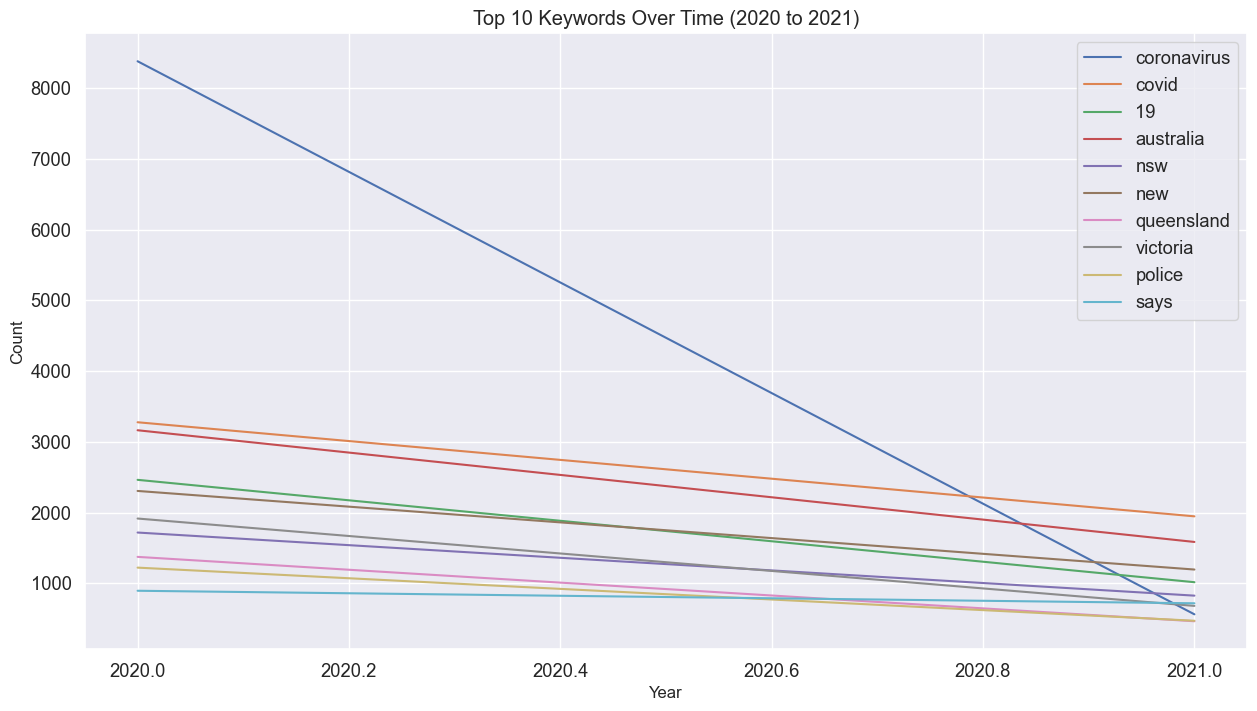

In [150]:
plot_top_words(abcnews_df, top_n=10, start_year=2020, end_year=2021) 

It was good to see that our feeling about the pandemics was right. 

Regardless, it seems that producing an analysis out of only one word doesn't give us much for a good insight. 

Coming back to our work, as we can't have any significant findings after going throughout the data analysis process, the best practice tells us to repeat the process again. 

# STEP 4 - Pre-processing the Data Again

### 4.1 - Creating word trios

The Data Analysis lifecycle is completed, however the analysis didn't fulfill its original purpose, which was to find out what were the hot topics over the years in Australia between 2003 and 2021. 
That said, let's create a new dataframe counting the most frequent word trios. 

In [155]:
# Function to generate word trios from a list of words, excluding stop words
def get_trios(words):
    trios = []
    filtered_words = [word for word in words if word.lower() not in stop_words]
    for i in range(len(filtered_words) - 2):
        trios.append((filtered_words[i], filtered_words[i+1], filtered_words[i+2]))
    return trios

# Initialize a list to hold all words
all_words_list = []

# Tokenize the headlines using regex to find all words and extract trios for each year
trio_counter_by_year = {}
for year, group in abcnews_df.groupby('year'):
    trio_counter = Counter()
    for headline in group['headline_text']:
        words = re.findall(r'\w+', str(headline))
        all_words_list.extend(words)
        trios = get_trios(words)
        trio_counter.update(trios)
    trio_counter_by_year[year] = trio_counter

# Convert the trio counts to a DataFrame and display the top 20 trios for each year
top_trios_by_year = {}
for year, trio_counter in trio_counter_by_year.items():
    df_trio_counts = pd.DataFrame(trio_counter.items(), columns=['Trio', 'Count'])
    df_trio_counts['Trio'] = df_trio_counts['Trio'].apply(lambda x: ' '.join(x))
    df_trio_counts = df_trio_counts.sort_values(by='Count', ascending=False)
    top_trios_by_year[year] = df_trio_counts.head(10)  # Store top 10 for plotting
    print(f"Top 20 trios for year {year}")
    print(df_trio_counts.head(20))
    print("\n")

Top 20 trios for year 2003
                           Trio  Count
1068             man face court     57
44645         us soldier killed     42
4137         us soldiers killed     34
2383           death toll rises     31
2015            rugby world cup     31
14442         man pleads guilty     30
951         anti war protesters     28
3498            man faces court     26
31877           two us soldiers     24
1210           police seek help     21
3620            fatal car crash     20
8849            free trade deal     19
32397            nsw govt urged     19
589          court drug charges     18
15348  search continues missing     18
15135        jobless rate falls     18
10269         anti war protests     17
36618            fed govt urged     17
5410             vic govt urged     17
10709            tour de france     17


Top 20 trios for year 2004
                           Trio  Count
838             man front court     52
1422            free trade deal     44
12187   

# STEP 5 - NEW VISUALIZATIONS

### 5.1 - Grid Line Chart 

The output above demonstrates that there are some results that look doubled.
Besides, it would be a good action to replace some word trios for the topic they're related to.
Visualizing these modifications each year will help us out to have an idea what it is like. 
In practical terms, this is new pre-processing, so we can have a better result.

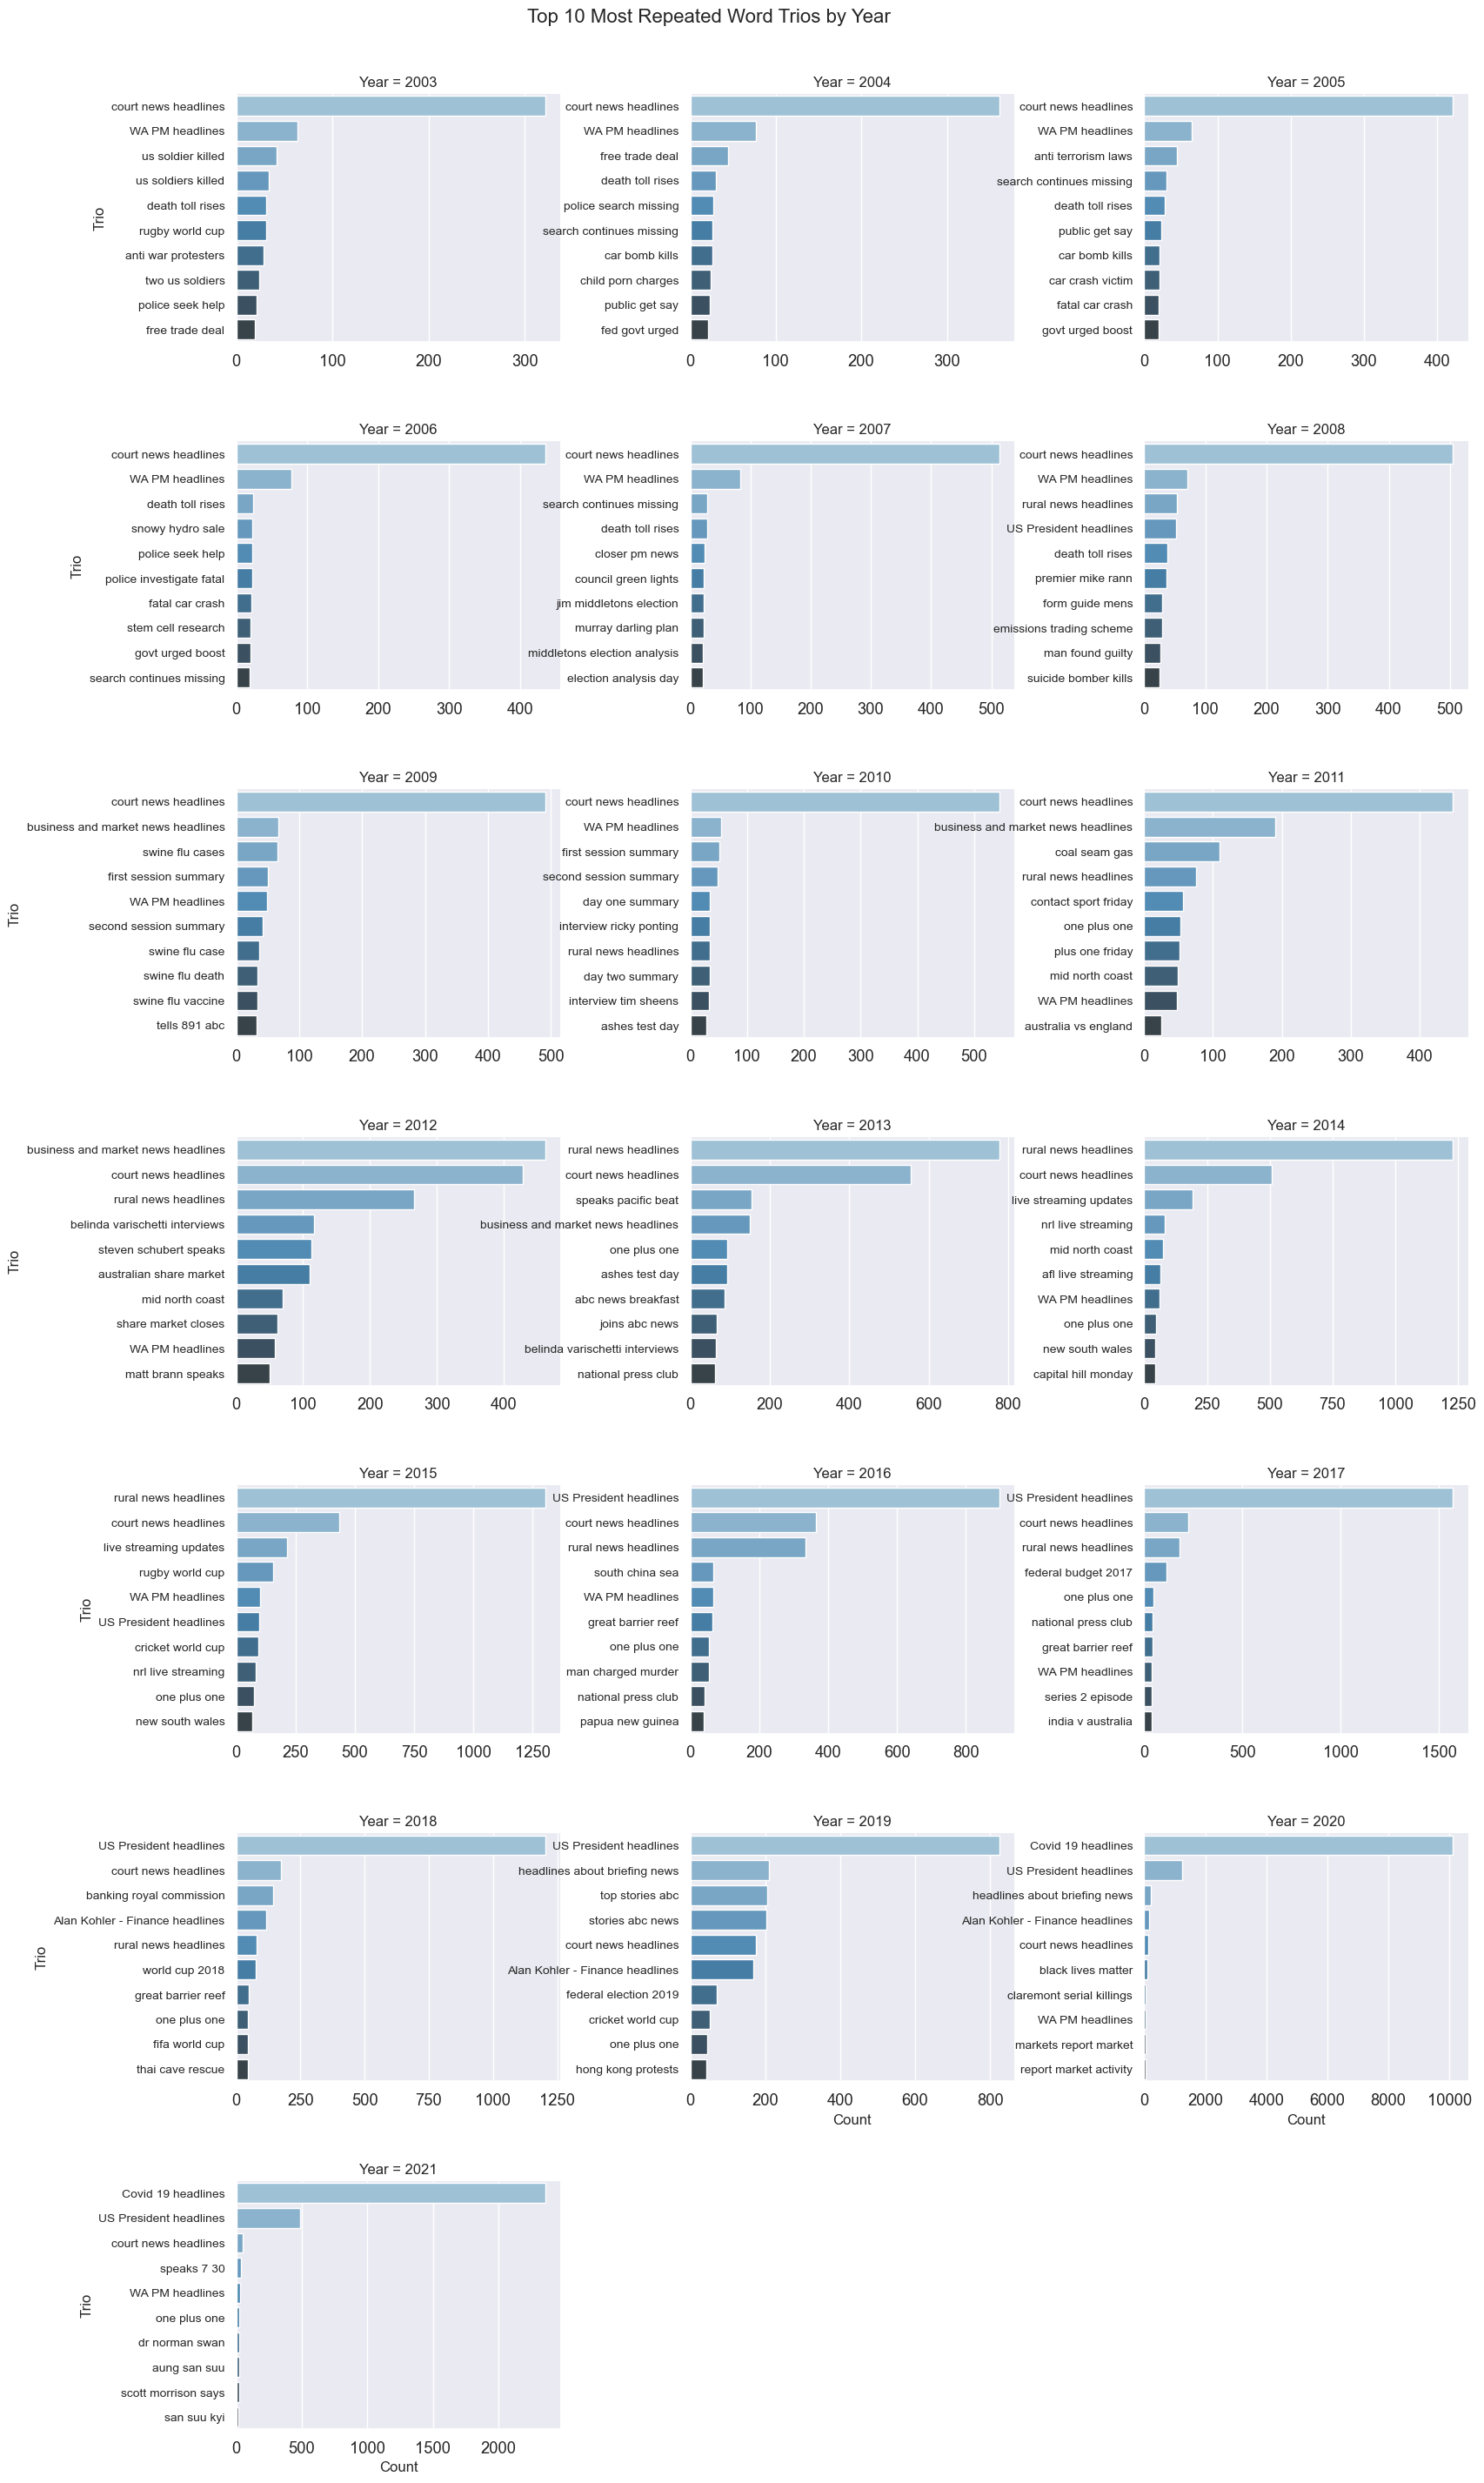

In [168]:
warnings.filterwarnings('ignore')

def custom_labels(headline):
    headline = headline.lower()
    
    if any(term in headline for term in ["rural news", "news rural", "country hour"]):
        return "rural news headlines"
    if any(term in headline for term in ["trump", "biden", "joe president", "joe biden", "us president"]):
        return "US President headlines"
    if "killed soldiers" in headline or "killed soldier" in headline:
        return "killed soldier headlines"
    if any(term in headline for term in ["one plus one", "one plus", "plus one"]):
        return None  # Exclude these headlines
    if any(term in headline for term in ["scott", "morrison"]) and any(term in headline for term in ["prime", "minister"]):
        return "Scott Morrison headlines"
    if any(term in headline for term in ["mark", "mcgowan", "wa"]) and any(term in headline for term in ["prime", "minister"]):
        return "WA PM headlines"
    if "finance" in headline and "alan" in headline:
        return "Alan Kohler - Finance headlines"
    if any(term in headline for term in ["briefing", "morning", "news"]):
        terms = re.findall(r'\w+', headline)
        if sum(1 for word in ["briefing", "morning", "news"] if word in terms) >= 2:
            return "headlines about briefing news"
    if "guilty" in headline and "pleads" in headline or \
       "court" in headline and ("man" in headline or "woman" in headline) or \
       "accused" in headline and "court" in headline:
        return "court news headlines"
    if "business" in headline and "news" in headline or \
       "market" in headline and "news" in headline:
        return "business and market news headlines"
    if "acquired" in headline and ("local" in headline or "locally" in headline) or \
       "covid" in headline or "coronavirus" in headline:
        return "Covid 19 headlines"

    return None

# Function to generate word trios from a list of words, excluding stop words
def get_trios(words):
    trios = []
    filtered_words = [word for word in words if word.lower() not in stop_words]
    for i in range(len(filtered_words) - 2):
        trios.append((filtered_words[i], filtered_words[i+1], filtered_words[i+2]))
    return trios

# Initialize a list to hold all words
all_words_list = []

# Tokenize again the headlines using regex to find all words and extract trios for each year
trio_counter_by_year = {}
for year, group in abcnews_df.groupby('year'):
    trio_counter = Counter()
    for headline in group['headline_text']:
        label = custom_labels(headline)
        if label:
            trio_counter.update([label])
        else:
            words = re.findall(r'\w+', str(headline))
            all_words_list.extend(words)
            trios = get_trios(words)
            trio_counter.update(trios)
    trio_counter_by_year[year] = trio_counter

# Convert the trio counts to a DataFrame for plotting
trio_df = pd.DataFrame(columns=['Year', 'Trio', 'Count'])
for year, trio_counter in trio_counter_by_year.items():
    df_trio_counts = pd.DataFrame(trio_counter.items(), columns=['Trio', 'Count'])
    df_trio_counts['Trio'] = df_trio_counts['Trio'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x)
    df_trio_counts = df_trio_counts.sort_values(by='Count', ascending=False).head(10)
    df_trio_counts['Year'] = year
    trio_df = pd.concat([trio_df, df_trio_counts], ignore_index=True)

# Plotting the histograms
sns.set(style="darkgrid", font_scale=1.2, rc={'figure.figsize': (20, 25), 'axes.labelsize': 12})
g = sns.FacetGrid(trio_df, col="Year", col_wrap=3, sharex=False, sharey=False, height=4, aspect=1.5)
g.map_dataframe(sns.barplot, x="Count", y="Trio", palette="Blues_d", orient='h')

# Adjust the labels and titles
for ax in g.axes.flat:
    ax.set_ylabel('')
    ax.set_xlabel('')
    for label in ax.get_yticklabels():
        label.set_rotation(0)
        label.set_fontsize(10)
    ax.set_title(ax.get_title(), fontsize=12)

# Set the main title and axis labels
g.fig.suptitle('Top 10 Most Repeated Word Trios by Year', fontsize=16, y=1.02)
g.set_axis_labels("Count", "Trio")

# Add space between the plots
g.fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.show()

Now we can have a better insight out of this vizualization.

# STEP 6 - CONCLUSION

By analyzing word frequencies and their trends over the years, we gain insights into the major topics of interest in Australian news media. This provides a better understanding of the public debate in this specific media outlet.

In this scenario, we have the top words trio headlines for each year, some grouped by topic. Considering that a headline summarizes the most relevant content conveyed by the media, we can assume these headlines reflect the interests of the Australian audience. Analyzing the most important topics gives us insights into public interest over time.

Some highlights from the analysis include:

* The pandemic discussion dominated the debate between 2020 and 2021.
* In the early 2000s, there was significant public interest in agricultural news.
* Australian audiences are very interested in judicial trials and justice-related news.
* Geopolitical news involving the United States was consistently present, dominating some years.
* War was a significant interest in some years.
* Local politics, including mentions of Premiers and elections, were of high interest.
* Finance, including shares, business, and markets, was a notable topic of interest.

So, recapping what was done above in a nutshell:

* *First*: Access ABCNews headlines newspaper between 2003 and 2021.
* *Second*: Use of trios of words, as a way of capturing a closer meaning of each headline.Third: Checking the most repeated trios by year, from 2003 to 2021.
* *Fourth*: By grouping word trios by probable topic, we can have a better view of the most discussed topics over the years.
* *Fifth*: Finally, visualizing each year can give us a better understanding of the public debate in news in this specific media outlet.
  
Further pre-processing, such as grouping the dataset by years or transforming the publish_date into a date type for more detailed analysis, could enhance the findings. However, the intent of this work is to showcase analytical skills on an extensive dataset, a goal that has been achieved.